### EURUSD

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
eurusd_1 = pd.read_csv("data/EURUSD1.CSV")
eurusd_1.head()

,2024-06-11 00:33\t1.07618\t1.07623\t1.07618\t1.07618\t82
0,2024-06-11 00:34\t1.07619\t1.07621\t1.07616\t1...
1,2024-06-11 00:35\t1.07619\t1.07621\t1.07616\t1...
2,2024-06-11 00:36\t1.07619\t1.07626\t1.07619\t1...
3,2024-06-11 00:37\t1.07624\t1.07624\t1.07622\t1...
4,2024-06-11 00:38\t1.07624\t1.07626\t1.07622\t1...


In [3]:
if len(eurusd_1.columns) == 1:
    eurusd_1 = eurusd_1[eurusd_1.columns[0]].str.split('\t', expand=True)

In [4]:
# Standardize column names
eurusd_1.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [5]:
eurusd_1.head()

,DateTime,Open,High,Low,Close,Volume
0,2024-06-11 00:34,1.07619,1.07621,1.07616,1.07620,109
1,2024-06-11 00:35,1.07619,1.07621,1.07616,1.07621,55
2,2024-06-11 00:36,1.07619,1.07626,1.07619,1.07623,54
3,2024-06-11 00:37,1.07624,1.07624,1.07622,1.07623,110
4,2024-06-11 00:38,1.07624,1.07626,1.07622,1.07623,75


#### Data cleaning

Convert to datetime

In [6]:
# Convert DateTime column to datetime
eurusd_1['DateTime'] = pd.to_datetime(eurusd_1['DateTime'])

In [7]:
eurusd_1.head()

,DateTime,Open,High,Low,Close,Volume
0,2024-06-11 00:34:00,1.07619,1.07621,1.07616,1.07620,109
1,2024-06-11 00:35:00,1.07619,1.07621,1.07616,1.07621,55
2,2024-06-11 00:36:00,1.07619,1.07626,1.07619,1.07623,54
3,2024-06-11 00:37:00,1.07624,1.07624,1.07622,1.07623,110
4,2024-06-11 00:38:00,1.07624,1.07626,1.07622,1.07623,75


In [8]:
# Sort by DateTime
eurusd_1 = eurusd_1.sort_values('DateTime').reset_index(drop=True)

In [9]:
eurusd_1.head()

,DateTime,Open,High,Low,Close,Volume
0,2024-06-11 00:34:00,1.07619,1.07621,1.07616,1.07620,109
1,2024-06-11 00:35:00,1.07619,1.07621,1.07616,1.07621,55
2,2024-06-11 00:36:00,1.07619,1.07626,1.07619,1.07623,54
3,2024-06-11 00:37:00,1.07624,1.07624,1.07622,1.07623,110
4,2024-06-11 00:38:00,1.07624,1.07626,1.07622,1.07623,75


Convert numeric columns to float


In [10]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    eurusd_1[col] = pd.to_numeric(eurusd_1[col], errors='coerce')


Handle Missing values

In [11]:
# Check for missing values
missing_values = eurusd_1.isnull().sum()
missing_values

DateTime    0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [12]:
# Exploratory Data Analysis
eurusd_1.describe()

,DateTime,Open,High,Low,Close,Volume
count,195543,195543.000000,195543.000000,195543.000000,195543.000000,195543.000000
mean,2024-09-16 10:39:16.669888256,1.083573,1.083634,1.083511,1.083572,179.049524
min,2024-06-11 00:34:00,1.033960,1.034660,1.033250,1.033980,1.000000
25%,2024-07-30 03:40:30,1.070560,1.070610,1.070510,1.070550,60.000000
50%,2024-09-17 02:48:00,1.084680,1.084730,1.084620,1.084680,128.000000
75%,2024-11-05 01:48:30,1.101270,1.101310,1.101240,1.101270,234.000000
max,2024-12-23 16:59:00,1.121220,1.121400,1.121070,1.121220,4376.000000
std,NaN,0.021176,0.021168,0.021184,0.021176,182.381894


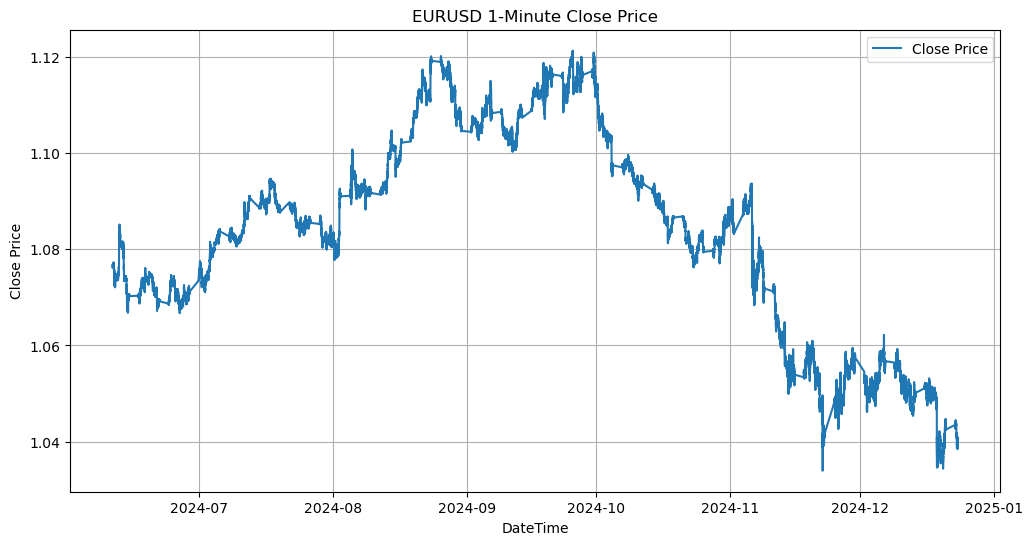

In [13]:
# Visualize Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(eurusd_1['DateTime'], eurusd_1['Close'], label='Close Price')
plt.title('EURUSD 1-Minute Close Price')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

#### Feature engineering

In [25]:
# Feature Engineering
# def calculate_features(df):
#     # Moving Averages
#     df['SMA_5'] = df['Close'].rolling(window=5).mean()
#     df['SMA_15'] = df['Close'].rolling(window=15).mean()

#     # RSI Calculation
#     delta = df['Close'].diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
#     rs = gain / loss
#     df['RSI_14'] = 100 - (100 / (1 + rs))

#     return df

# Feature Engineering - Adding indicators
def add_indicators(df):
    # Exponential Moving Averages
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
    df['EMA_15'] = df['Close'].ewm(span=15, adjust=False).mean()

    # Bollinger Bands
    df['BB_Middle'] = df['Close'].rolling(window=20).mean()
    df['BB_Upper'] = df['BB_Middle'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_Lower'] = df['BB_Middle'] - 2 * df['Close'].rolling(window=20).std()

    # Average True Range (ATR)
    df['TR'] = abs(df['High'] - df['Low'])
    df['ATR'] = df['TR'].rolling(window=14).mean()

    # Moving Average Convergence Divergence (MACD)
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Longer-term Moving Averages
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

    # ADX (Average Directional Index)
    high_low = df['High'] - df['Low']
    high_close = abs(df['High'] - df['Close'].shift(1))
    low_close = abs(df['Low'] - df['Close'].shift(1))
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['TR'] = true_range  # Update true range
    df['ATR_14'] = df['TR'].rolling(window=14).mean()
    plus_dm = (df['High'] - df['High'].shift(1)).where((df['High'] - df['High'].shift(1)) > (df['Low'].shift(1) - df['Low']), 0)
    minus_dm = (df['Low'].shift(1) - df['Low']).where((df['Low'].shift(1) - df['Low']) > (df['High'] - df['High'].shift(1)), 0)
    plus_di = 100 * (plus_dm.rolling(window=14).sum() / df['ATR_14'])
    minus_di = 100 * (minus_dm.rolling(window=14).sum() / df['ATR_14'])
    dx = 100 * (abs(plus_di - minus_di) / (plus_di + minus_di))
    df['ADX_14'] = dx.rolling(window=14).mean()

    # Stochastic Oscillator
    df['Stochastic_%K'] = ((df['Close'] - df['Low'].rolling(window=14).min()) /
                           (df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min())) * 100
    df['Stochastic_%D'] = df['Stochastic_%K'].rolling(window=3).mean()

    # Williams %R
    df['Williams_%R'] = ((df['High'].rolling(window=14).max() - df['Close']) /
                         (df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min())) * -100

    # Chandelier Exit
    df['Chandelier_Exit_Long'] = df['High'].rolling(window=22).max() - (3 * df['ATR_14'])
    df['Chandelier_Exit_Short'] = df['Low'].rolling(window=22).min() + (3 * df['ATR_14'])

    # Volume Weighted Average Price (VWAP)
    df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()

    return df



In [26]:
# Add indicators to the dataset
eurusd_1 = add_indicators(eurusd_1)

In [27]:
# Label Creation - Binary classification for price increase
eurusd_1['Price_Next'] = eurusd_1['Close'].shift(-1)
eurusd_1['Target'] = (eurusd_1['Price_Next'] > eurusd_1['Close']).astype(int)

In [28]:
# Check for missing values
missing_values_1 = eurusd_1.isnull().sum()
missing_values_1

DateTime                  0
Open                      0
High                      0
Low                       0
Close                     0
Volume                    0
EMA_5                     0
EMA_15                    0
BB_Middle                19
BB_Upper                 19
BB_Lower                 19
TR                        0
ATR                      13
MACD                      0
MACD_Signal               0
Price_Next                1
Target                    0
SMA_50                   49
EMA_50                    0
ATR_14                   13
ADX_14                   49
Stochastic_%K            23
Stochastic_%D            27
Williams_%R              23
Chandelier_Exit_Long     21
Chandelier_Exit_Short    21
VWAP                      0
dtype: int64

In [29]:
# Replace missing values with the mode of each column
for col in eurusd_1.columns:
    if eurusd_1[col].isnull().any():
        mode_value = eurusd_1[col].mode()[0]
        eurusd_1[col].fillna(mode_value, inplace=True)

C:\Users\DAVE\AppData\Local\Temp\ipykernel_4848\3775129189.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eurusd_1[col].fillna(mode_value, inplace=True)


In [30]:
# Verify no missing values remain
missing_values2 = eurusd_1.isnull().sum()
missing_values2

DateTime                 0
Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
EMA_5                    0
EMA_15                   0
BB_Middle                0
BB_Upper                 0
BB_Lower                 0
TR                       0
ATR                      0
MACD                     0
MACD_Signal              0
Price_Next               0
Target                   0
SMA_50                   0
EMA_50                   0
ATR_14                   0
ADX_14                   0
Stochastic_%K            0
Stochastic_%D            0
Williams_%R              0
Chandelier_Exit_Long     0
Chandelier_Exit_Short    0
VWAP                     0
dtype: int64

In [33]:
# Verify and re-add missing indicators to ensure consistency
def ensure_features_exist(df):
    # Recalculate missing Moving Averages
    if 'SMA_5' not in df.columns:
        df['SMA_5'] = df['Close'].rolling(window=5).mean()
    if 'SMA_15' not in df.columns:
        df['SMA_15'] = df['Close'].rolling(window=15).mean()
    
    # Recalculate RSI if missing
    if 'RSI_14' not in df.columns:
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        df['RSI_14'] = 100 - (100 / (1 + rs))

    return df

In [34]:
# Ensure all required features are in the dataset
eurusd_1 = ensure_features_exist(eurusd_1)



### Exploratory data analysis

In [35]:
import seaborn as sns

# Correlation Analysis
correlation_matrix = eurusd_1[['Close', 'SMA_5', 'EMA_5', 'SMA_15', 'EMA_15', 
                                'SMA_50', 'EMA_50', 'BB_Middle', 'BB_Upper', 'BB_Lower',
                                'ATR', 'ATR_14', 'MACD', 'MACD_Signal', 
                                'RSI_14', 'ADX_14', 'Stochastic_%K', 'Williams_%R']].corr()

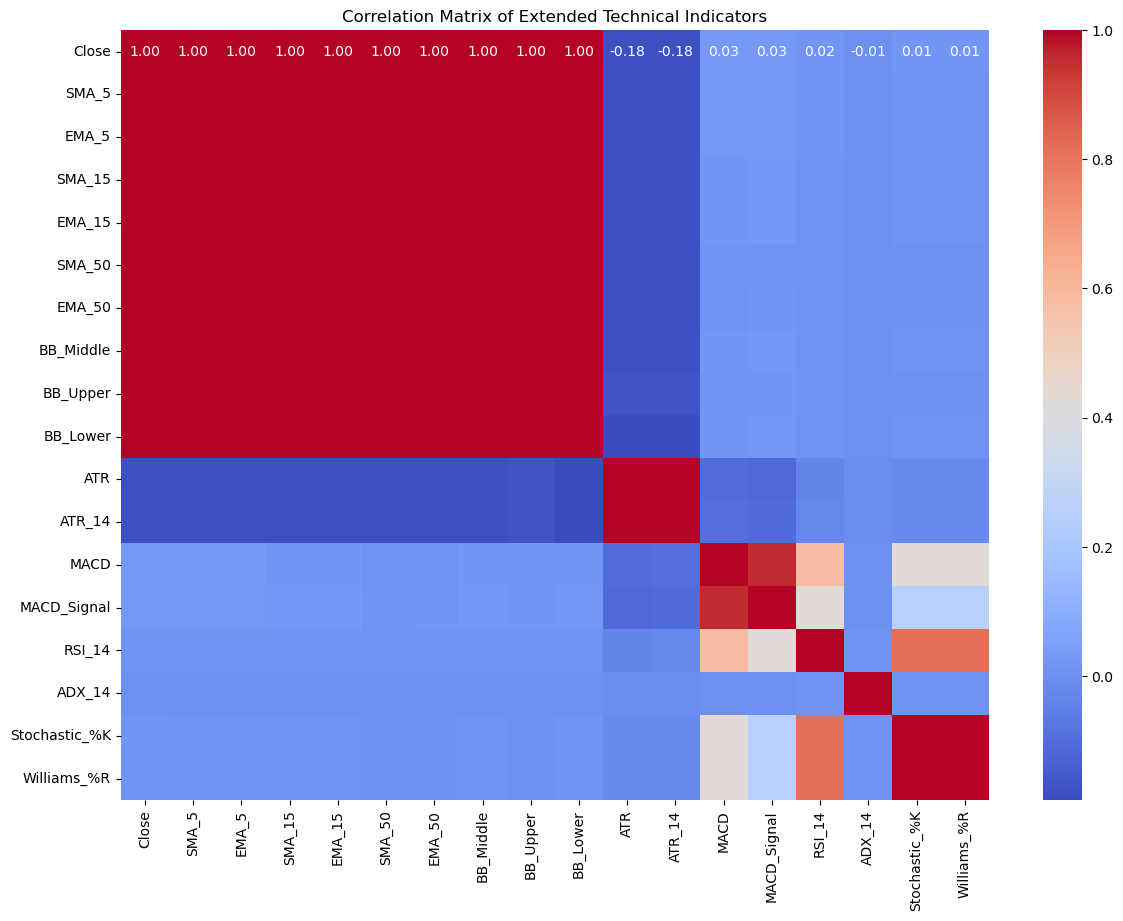

In [36]:
# Display the updated correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Extended Technical Indicators")
plt.show()

c:\Users\DAVE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


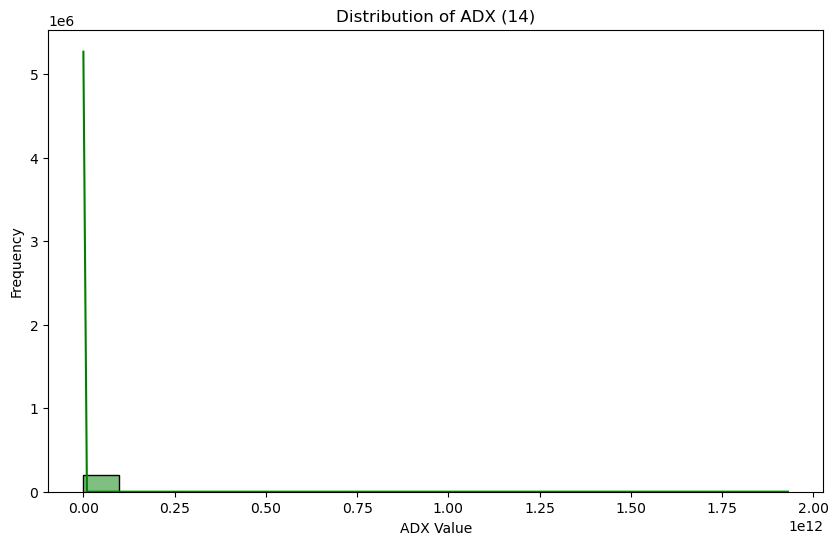

In [37]:
# Distribution of ADX (trend strength)
plt.figure(figsize=(10, 6))
sns.histplot(eurusd_1['ADX_14'], bins=20, kde=True, color='green')
plt.title('Distribution of ADX (14)')
plt.xlabel('ADX Value')
plt.ylabel('Frequency')
plt.show()

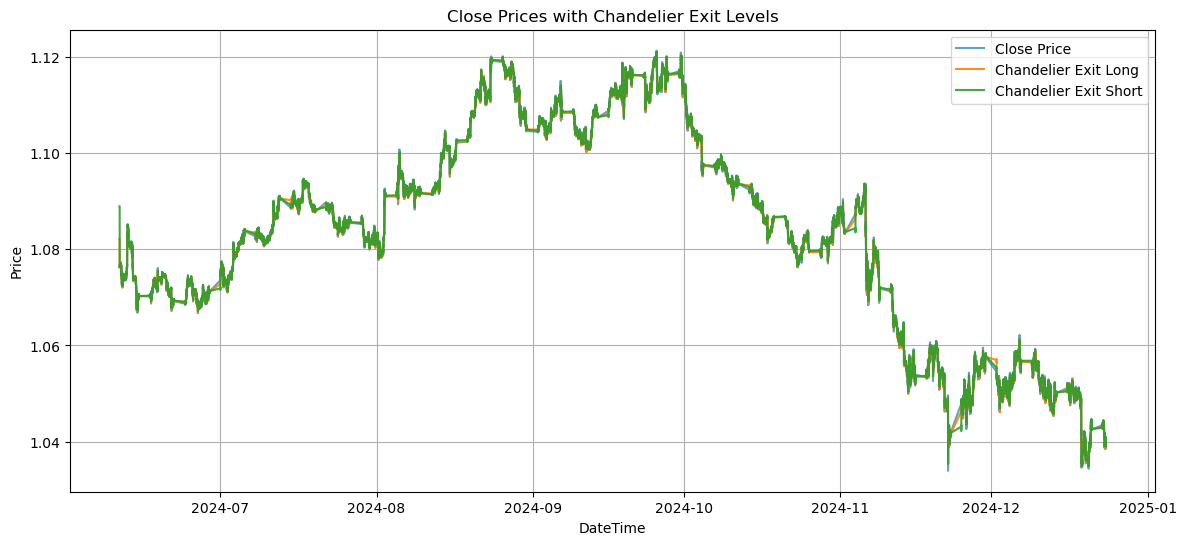

In [38]:
# Close Prices with ATR and Chandelier Exit levels
plt.figure(figsize=(14, 6))
plt.plot(eurusd_1['DateTime'], eurusd_1['Close'], label='Close Price', alpha=0.7)
plt.plot(eurusd_1['DateTime'], eurusd_1['Chandelier_Exit_Long'], label='Chandelier Exit Long', alpha=0.9)
plt.plot(eurusd_1['DateTime'], eurusd_1['Chandelier_Exit_Short'], label='Chandelier Exit Short', alpha=0.9)
plt.title('Close Prices with Chandelier Exit Levels')
plt.xlabel('DateTime')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

c:\Users\DAVE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


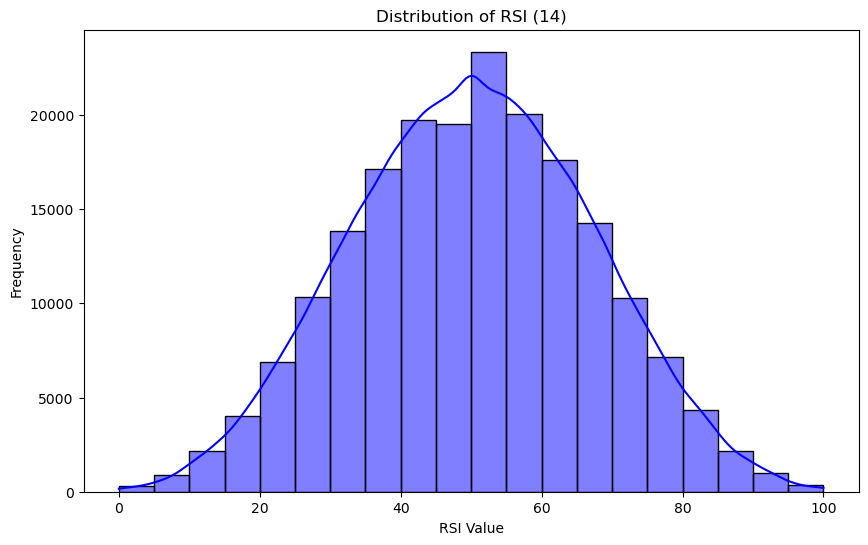

In [41]:
# Histogram of RSI values
plt.figure(figsize=(10, 6))
sns.histplot(eurusd_1['RSI_14'], bins=20, kde=True, color='blue')
plt.title('Distribution of RSI (14)')
plt.xlabel('RSI Value')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Display Summary Statistics for new features
eda_summary = eurusd_1[['ADX_14', 'Stochastic_%K', 'Williams_%R', 'SMA_50', 'EMA_50']].describe()
eda_summary

,ADX_14,Stochastic_%K,Williams_%R,SMA_50,EMA_50
count,1.955430e+05,195543.000000,195543.000000,195543.000000,195543.000000
mean,1.381884e+08,50.431521,-49.568479,1.083578,1.083576
std,1.633105e+10,31.950904,31.950904,0.021168,0.021166
min,-2.461637e+01,0.000000,-100.000000,1.034971,1.035118
25%,2.342101e+01,21.153846,-78.846154,1.070581,1.070564
50%,3.330007e+01,50.704225,-49.295775,1.084713,1.084694
75%,4.615614e+01,80.000000,-20.000000,1.101271,1.101263
max,1.930126e+12,100.000000,-0.000000,1.120571,1.120406


### **Investigate indicators further**

Investigating  indicators involves analyzing their behavior, relationships with price movements, and potential predictive value.

**Questions to Address During Investigation**
* Do specific indicator values consistently align with price reversals or continuations?
* Are certain indicators better suited for short-term vs. long-term trends?
* Do combinations of indicators provide stronger signals than individual ones?

In [42]:
# Plot EMA crossovers with RSI values
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

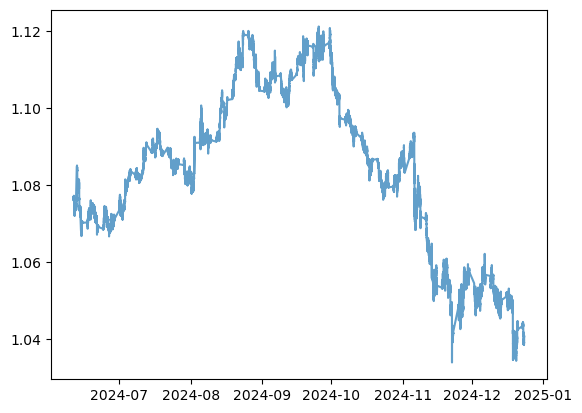

In [43]:
# Plot close prices
plt.plot(eurusd_1['DateTime'], eurusd_1['Close'], label='Close Price', alpha=0.7)


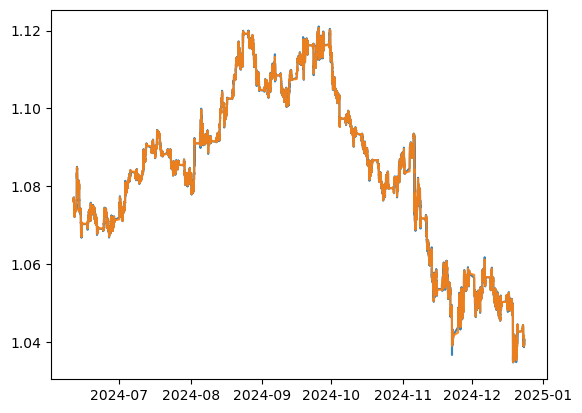

In [44]:
# Plot EMA 5 and EMA 15
plt.plot(eurusd_1['DateTime'], eurusd_1['EMA_5'], label='EMA 5', alpha=0.9)
plt.plot(eurusd_1['DateTime'], eurusd_1['EMA_15'], label='EMA 15', alpha=0.9)

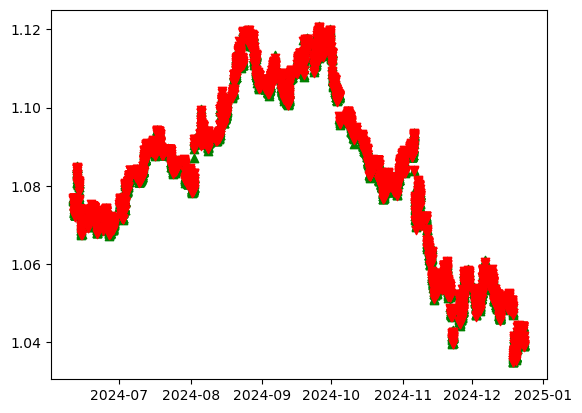

In [46]:
# Highlight crossover points where EMA 5 crosses EMA 15
crossovers_buy = (eurusd_1['EMA_5'] > eurusd_1['EMA_15']) & (eurusd_1['EMA_5'].shift(1) <= eurusd_1['EMA_15'].shift(1))
crossovers_sell = (eurusd_1['EMA_5'] < eurusd_1['EMA_15']) & (eurusd_1['EMA_5'].shift(1) >= eurusd_1['EMA_15'].shift(1))

plt.scatter(eurusd_1.loc[crossovers_buy, 'DateTime'], eurusd_1.loc[crossovers_buy, 'Close'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(eurusd_1.loc[crossovers_sell, 'DateTime'], eurusd_1.loc[crossovers_sell, 'Close'], color='red', label='Sell Signal', marker='v', alpha=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


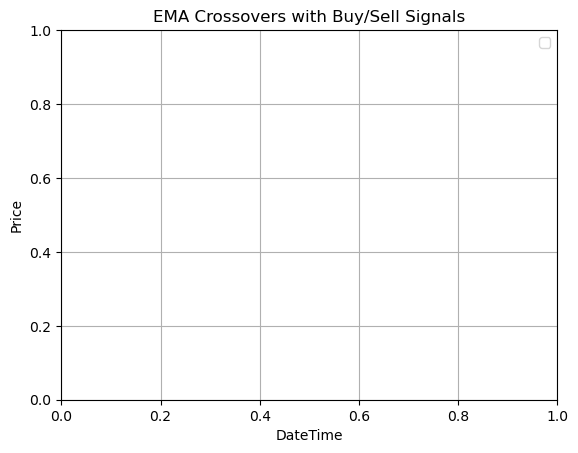

In [47]:
# Configure plot
plt.title('EMA Crossovers with Buy/Sell Signals')
plt.xlabel('DateTime')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [53]:
eurusd_1.columns

Index(['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'EMA_5', 'EMA_15',
       'BB_Middle', 'BB_Upper', 'BB_Lower', 'TR', 'ATR', 'MACD', 'MACD_Signal',
       'Price_Next', 'Target', 'SMA_50', 'EMA_50', 'ATR_14', 'ADX_14',
       'Stochastic_%K', 'Stochastic_%D', 'Williams_%R', 'Chandelier_Exit_Long',
       'Chandelier_Exit_Short', 'VWAP', 'SMA_5', 'SMA_15', 'RSI_14'],
      dtype='object')

Missing Columns: []
Checking for missing values in required columns:
DateTime     0
Close        0
EMA_5        0
EMA_15       0
RSI_14      42
dtype: int64


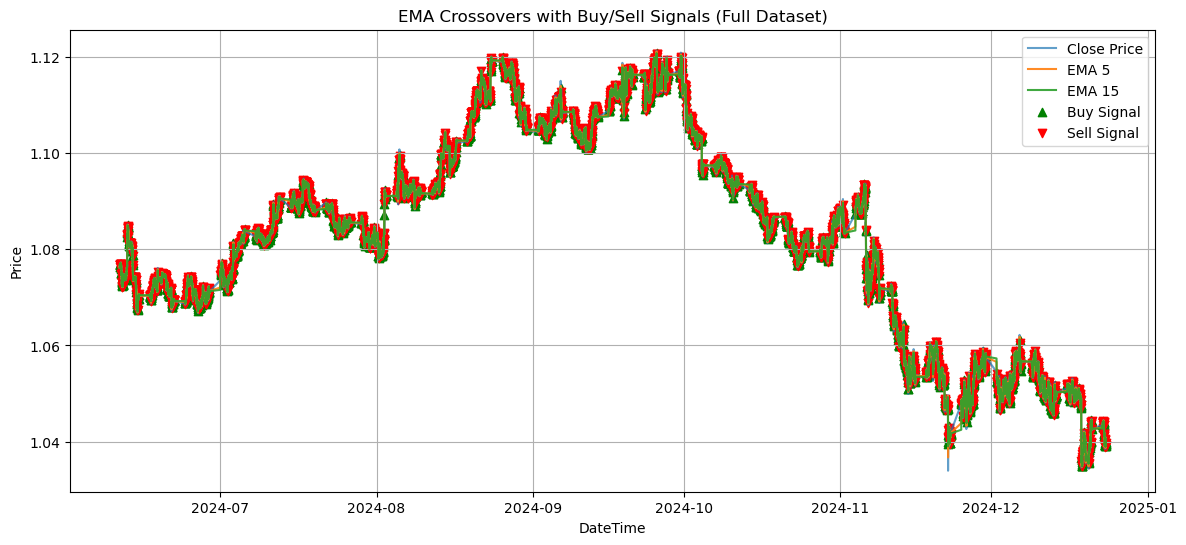

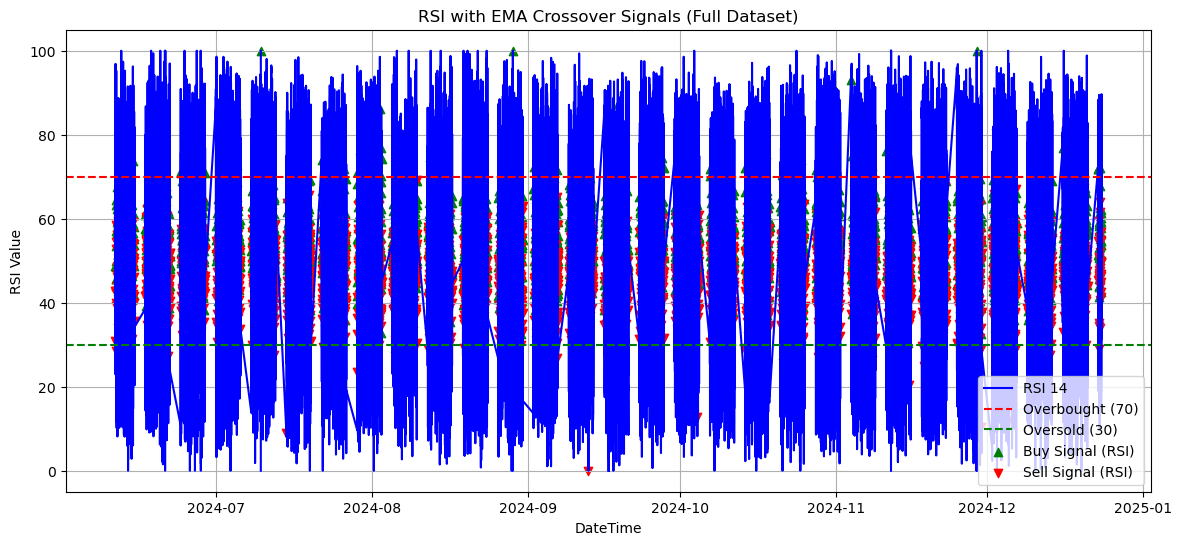

In [54]:
# Verify if all required columns exist and are valid in the full dataset
required_columns = ['DateTime', 'Close', 'EMA_5', 'EMA_15', 'RSI_14']
missing_columns = [col for col in required_columns if col not in eurusd_1.columns]
print("Missing Columns:", missing_columns)

if not missing_columns:
    print("Checking for missing values in required columns:")
    print(eurusd_1[required_columns].isnull().sum())

    # Proceed with plotting if data is valid
    plt.figure(figsize=(14, 6))
    plt.plot(eurusd_1['DateTime'], eurusd_1['Close'], label='Close Price', alpha=0.7)
    plt.plot(eurusd_1['DateTime'], eurusd_1['EMA_5'], label='EMA 5', alpha=0.9)
    plt.plot(eurusd_1['DateTime'], eurusd_1['EMA_15'], label='EMA 15', alpha=0.9)

    # Calculate buy and sell signals
    buy_signals = (eurusd_1['EMA_5'] > eurusd_1['EMA_15']) & (
        eurusd_1['EMA_5'].shift(1) <= eurusd_1['EMA_15'].shift(1))
    sell_signals = (eurusd_1['EMA_5'] < eurusd_1['EMA_15']) & (
        eurusd_1['EMA_5'].shift(1) >= eurusd_1['EMA_15'].shift(1))

    # Plot buy and sell signals
    plt.scatter(eurusd_1.loc[buy_signals, 'DateTime'], eurusd_1.loc[buy_signals, 'Close'],
                color='green', label='Buy Signal', marker='^', alpha=1)
    plt.scatter(eurusd_1.loc[sell_signals, 'DateTime'], eurusd_1.loc[sell_signals, 'Close'],
                color='red', label='Sell Signal', marker='v', alpha=1)

    plt.title('EMA Crossovers with Buy/Sell Signals (Full Dataset)')
    plt.xlabel('DateTime')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot RSI signals
    plt.figure(figsize=(14, 6))
    plt.plot(eurusd_1['DateTime'], eurusd_1['RSI_14'], label='RSI 14', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    plt.scatter(eurusd_1.loc[buy_signals, 'DateTime'], eurusd_1.loc[buy_signals, 'RSI_14'],
                color='green', label='Buy Signal (RSI)', marker='^', alpha=1)
    plt.scatter(eurusd_1.loc[sell_signals, 'DateTime'], eurusd_1.loc[sell_signals, 'RSI_14'],
                color='red', label='Sell Signal (RSI)', marker='v', alpha=1)

    plt.title('RSI with EMA Crossover Signals (Full Dataset)')
    plt.xlabel('DateTime')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Some required columns are missing, cannot proceed with plotting.")


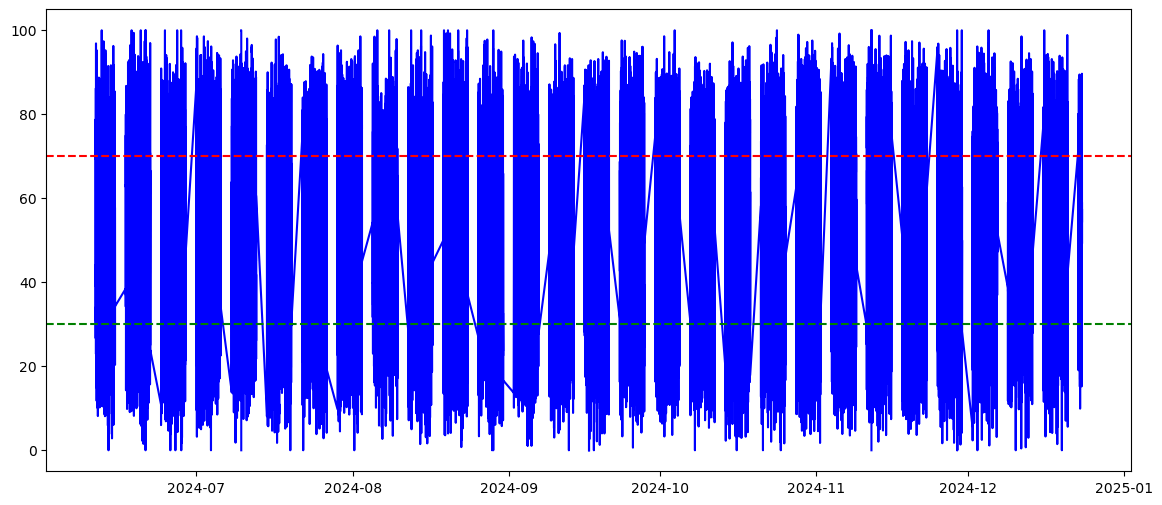

In [55]:
# Plot RSI to check overbought/oversold conditions
plt.figure(figsize=(14, 6))
plt.plot(eurusd_1['DateTime'], eurusd_1['RSI_14'], label='RSI 14', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

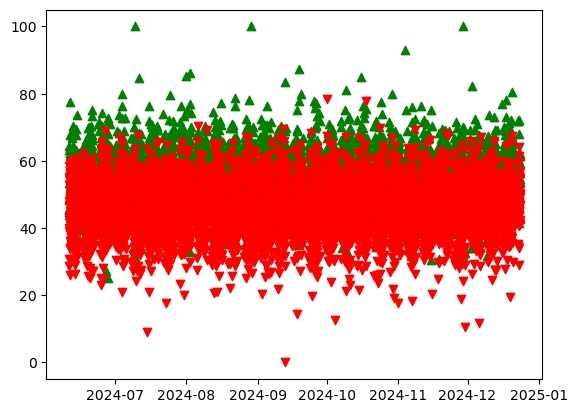

In [56]:
# Highlight RSI points near buy/sell signals
plt.scatter(eurusd_1.loc[crossovers_buy, 'DateTime'], eurusd_1.loc[crossovers_buy, 'RSI_14'], color='green', label='Buy Signal (RSI)', marker='^', alpha=1)
plt.scatter(eurusd_1.loc[crossovers_sell, 'DateTime'], eurusd_1.loc[crossovers_sell, 'RSI_14'], color='red', label='Sell Signal (RSI)', marker='v', alpha=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


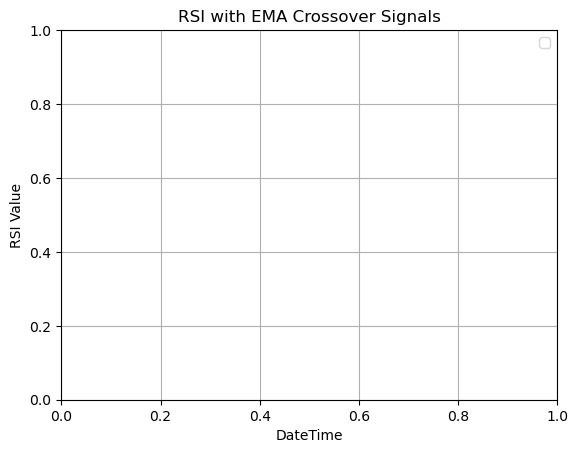

In [57]:
# Configure plot
plt.title('RSI with EMA Crossover Signals')
plt.xlabel('DateTime')
plt.ylabel('RSI Value')
plt.legend()
plt.grid()
plt.show()


In [58]:
# Summary of crossover signals
signal_summary = {
    'Total Buy Signals': crossovers_buy.sum(),
    'Total Sell Signals': crossovers_sell.sum(),
    'RSI Overbought Signals': (eurusd_1.loc[crossovers_sell, 'RSI_14'] > 70).sum(),
    'RSI Oversold Signals': (eurusd_1.loc[crossovers_buy, 'RSI_14'] < 30).sum()
}


#### Analyze performance of EMA crossover signals

Define a simple strategy: Buy at buy signals, sell at sell signals

In [59]:
# Create a performance DataFrame to track signals and corresponding returns
performance_data = eurusd_1[['DateTime', 'Close']].copy()
performance_data['Buy_Signal'] = (eurusd_1['EMA_5'] > eurusd_1['EMA_15']) & (
    eurusd_1['EMA_5'].shift(1) <= eurusd_1['EMA_15'].shift(1))
performance_data['Sell_Signal'] = (eurusd_1['EMA_5'] < eurusd_1['EMA_15']) & (
    eurusd_1['EMA_5'].shift(1) >= eurusd_1['EMA_15'].shift(1))

In [60]:
# Calculate returns: Assume we enter on the close price of the buy signal and exit on the sell signal
performance_data['Position'] = 0  # 1 for buy, -1 for sell, 0 for no position
performance_data.loc[performance_data['Buy_Signal'], 'Position'] = 1
performance_data.loc[performance_data['Sell_Signal'], 'Position'] = -1

In [61]:
# Forward fill positions to simulate holding until the next signal
performance_data['Position'] = performance_data['Position'].replace(0, method='ffill')

C:\Users\DAVE\AppData\Local\Temp\ipykernel_4848\3901907426.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  performance_data['Position'] = performance_data['Position'].replace(0, method='ffill')


In [62]:
# Calculate returns
performance_data['Shifted_Close'] = performance_data['Close'].shift(1)
performance_data['Returns'] = performance_data['Position'] * (
    performance_data['Close'] - performance_data['Shifted_Close']
)

In [63]:
# Calculate cumulative returns
performance_data['Cumulative_Returns'] = performance_data['Returns'].cumsum()

In [64]:
# Display a summary of performance metrics
total_signals = performance_data['Position'].diff().abs().sum()  # Count of position changes
total_profit = performance_data['Cumulative_Returns'].iloc[-1]
avg_return_per_trade = total_profit / total_signals if total_signals > 0 else 0

performance_summary = {
    'Total Signals': total_signals,
    'Total Profit': total_profit,
    'Average Return per Trade': avg_return_per_trade,
}

In [65]:
performance_summary

{'Total Signals': 28493.0,
 'Total Profit': 2.7567299999999912,
 'Average Return per Trade': 9.675113185694701e-05}

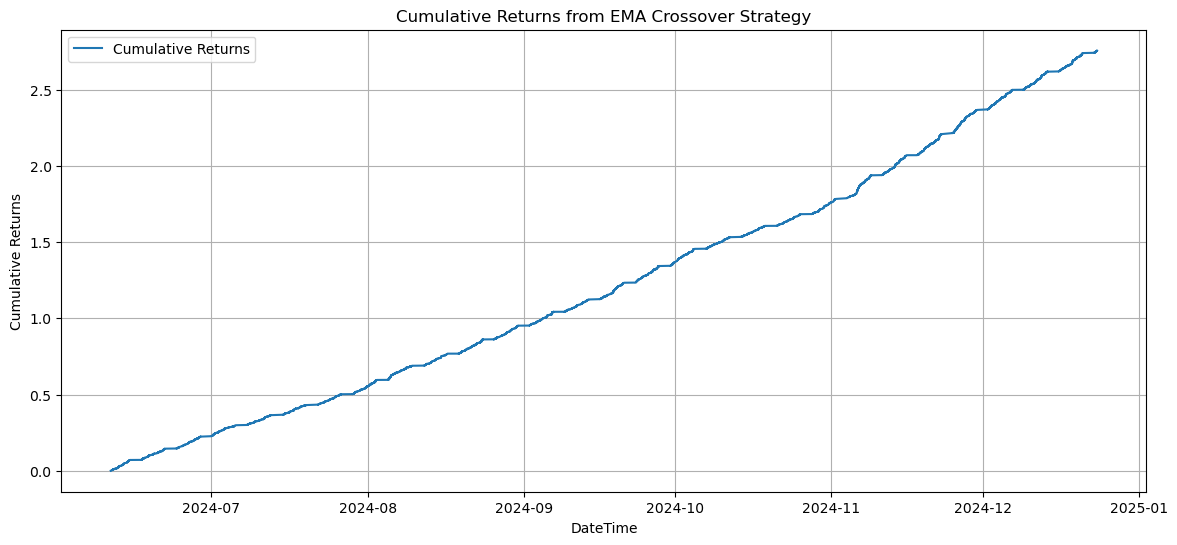

In [66]:
# Plot cumulative returns
plt.figure(figsize=(14, 6))
plt.plot(performance_data['DateTime'], performance_data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns from EMA Crossover Strategy')
plt.xlabel('DateTime')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pip install ace_tools